In [33]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/result.csv', parse_dates=['time'], index_col=['time'])
data

,outdoor_temp,zone_temp,occupancy,supply_temp,air_flow
time,,,,,
2017-01-01 00:00:00,2.200,22.832449,0,25.000003,0.733767
2017-01-01 00:05:00,1.825,22.824465,0,25.000003,0.733767
2017-01-01 00:10:00,1.450,22.812760,0,25.000003,0.733767
2017-01-01 00:15:00,1.075,22.799019,0,25.000003,0.733767
2017-01-01 00:20:00,0.700,22.784421,0,25.000003,0.733767
...,...,...,...,...,...
2017-12-31 23:40:00,6.000,22.990503,0,25.000004,0.733767
2017-12-31 23:45:00,6.000,22.988552,0,25.000004,0.733767
2017-12-31 23:50:00,6.000,22.986715,0,25.000004,0.733767


In [56]:
train_data = data.loc['2017-07-14 07:00:00':'2017-07-14 08:30:00']
test_data = data.loc['2017-07-14 08:35:00':'2017-07-14 09:30:00']

# Data Visualization

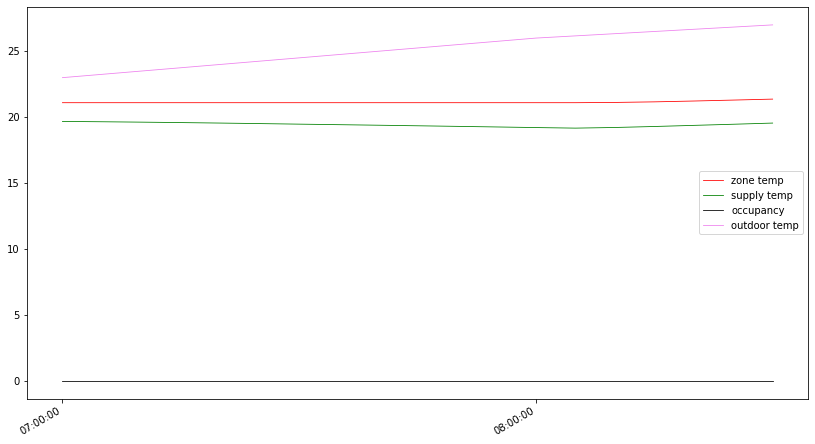

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(train_data.index, train_data['zone_temp'].values, color = 'red', linewidth = 0.8, label = 'zone temp')
ax.plot(train_data.index, train_data['supply_temp'].values, color = 'green', linewidth = 0.8, label = 'supply temp')
ax.plot(train_data.index, train_data['occupancy'].values, color = 'black', linewidth = 0.8, label = 'occupancy')
ax.plot(train_data.index, train_data['outdoor_temp'].values, color = 'violet', linewidth = 0.8, label = 'outdoor temp')
#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.legend()
plt.show()

<AxesSubplot:>

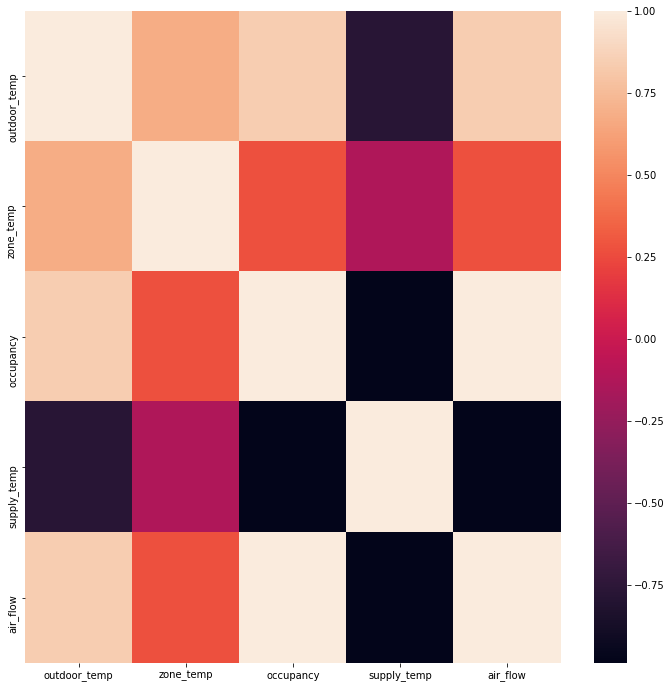

In [36]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(train.corr())

# Data Preprocessing

In [37]:
from sklearn.preprocessing import MinMaxScaler

x_train = train_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y_train = train_data[['zone_temp']]

x_test = test_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y_test = test_data[['zone_temp']]


scaler = MinMaxScaler().fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

# Linear Regression

In [38]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train_norm)
results = model.fit()
results.summary()

/Users/devanshukumar/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              zone_temp   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1936.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                    1.08e-20
Time:                        19:19:53   Log-Likelihood:                         -29.052
No. Observations:                  19   AIC:                                      64.10
Df Residuals:                      16   BIC:                                      66.94
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            26.4822      0.751     35.267      0.000      24.890      28.074
x2            11.7812      0.780     15.102      0.000      10.127      13.435
x3            -4.9600      1.855     -2.674      0.017      -8.892      -1.028
x4            11.7812      0.780     15.102      0.000      10.127      13.435
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.574
Skew:                          -0.900   Prob(JB):                        0.276
Kurtosis:                       2.896   Cond. No.                     1.64e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.46e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
pred = results.predict(x_test_norm)
print(pred)
print(y_test)

[21.66126879 22.30271216 23.02173245 23.82254884 24.67001974 25.55285069
 17.52006112 18.44645845 19.25057961 20.16275935 21.01938632 21.18527212]
                     zone_temp
time                          
2017-07-04 08:35:00  21.528289
2017-07-04 08:40:00  21.610417
2017-07-04 08:45:00  21.696889
2017-07-04 08:50:00  21.786183
2017-07-04 08:55:00  21.877137
2017-07-04 09:00:00  21.969014
2017-07-04 09:05:00  22.063374
2017-07-04 09:10:00  22.159507
2017-07-04 09:15:00  22.253181
2017-07-04 09:20:00  22.345068
2017-07-04 09:25:00  22.435268
2017-07-04 09:30:00  22.514583


In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred, squared = False)

2.5661471155846014

In [41]:
bounds = y_test.copy()
bounds['pred'] = pred


In [42]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
regressor = SVR()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print('y_test: ',y_test.zone_temp.values)
print('y_pred: ',y_pred)

0.71973958098604
y_test:  [21.52828856 21.61041664 21.6968895  21.7861834  21.87713665 21.96901362
 22.06337397 22.15950701 22.25318125 22.34506785 22.43526826 22.51458333]
y_pred:  [21.35443582 21.35758522 21.36070858 21.36380325 21.36686135 21.36987821
 21.37069652 21.3727115  21.37468632 21.376652   21.37858504 21.38039892]


/Users/devanshukumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Actual values vs Predicted values (Linear Regression)

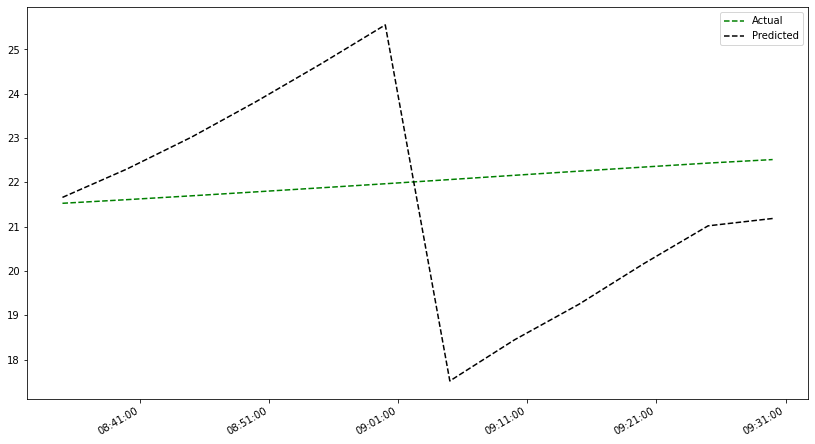

In [43]:
fig, ax = plt.subplots()
hours = mdates.MinuteLocator(interval = 10)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(bounds.index, bounds['zone_temp'].values, '--', color = 'green', label = 'Actual')
ax.plot(bounds.index, bounds['pred'].values, '--', color = 'black', label = 'Predicted')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
#plt.fill_between(bounds.index, bounds['upper'].values,bounds['lower'].values,color='cornflowerblue',alpha=.5)
plt.legend()
plt.show()

In [44]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(random_state=0).fit(x_train_norm, y_train)
gpr.score(x_train_norm, y_train)

pred = gpr.predict(x_test_norm, return_std=True)
# print(pred)
# print(y_test)

In [45]:
mean_squared_error(y_test, pred[0],squared = False)

1.7854222559970943

In [46]:
bounds = y_test.copy()
bounds['pred'] = pred[0]
bounds

,zone_temp,pred
time,,
2017-07-04 08:35:00,21.528289,21.467319
2017-07-04 08:40:00,21.610417,21.396669
2017-07-04 08:45:00,21.696889,21.210643
2017-07-04 08:50:00,21.786183,20.879123
2017-07-04 08:55:00,21.877137,20.389101
2017-07-04 09:00:00,21.969014,19.732558
2017-07-04 09:05:00,22.063374,21.863014
2017-07-04 09:10:00,22.159507,21.388948
2017-07-04 09:15:00,22.253181,20.844929


# Actual values vs Predicted values (Gaussain Process Regression)

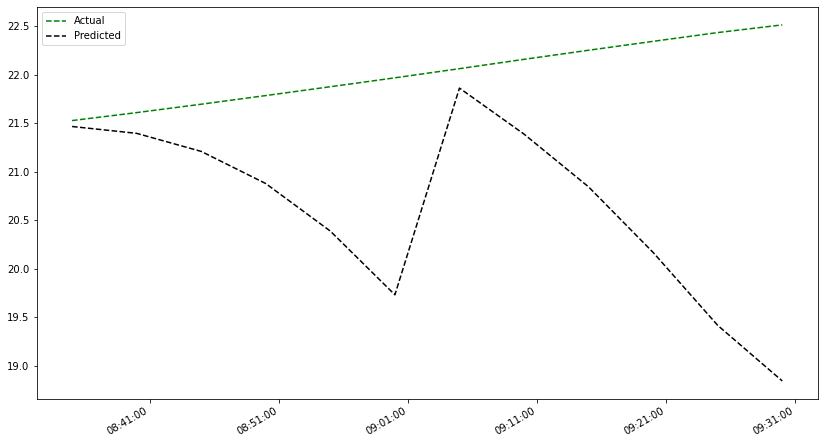

In [47]:
fig, ax = plt.subplots()
hours = mdates.MinuteLocator(interval = 10)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(bounds.index, bounds['zone_temp'].values, '--', color = 'green', label = 'Actual')
ax.plot(bounds.index, bounds['pred'].values, '--', color = 'black', label = 'Predicted')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
#plt.fill_between(bounds.index, bounds['upper'].values,bounds['lower'].values,color='cornflowerblue',alpha=.5)
plt.legend()
plt.show()

# Sample set up for Model precision feedback

In [58]:
from sklearn.model_selection import train_test_split

## loading dataset and initializations
#train = pd.read_csv('data/train_test/train2.csv')
#test = pd.read_csv('data/train_test/test2.csv')
#non_date_data = pd.read_csv('data/result.csv')
train = data.loc['2017-07-14 07:00:00':'2017-07-14 08:30:00']
test = data.loc['2017-07-14 08:35:00':'2017-07-14 09:30:00']
#train = data.loc['2017-06-01 07:45:00':'2017-06-01 08:45:00']
#print(train)
#train = train.set_index(pd.Index(range(0,13)),'time')
#print(train)
#test = data.loc['2017-06-01 08:50:00':'2017-06-01 09:20:00']
#test = test.set_index(pd.Index(range(0,7)),'time')
filtered_data = train[['supply_temp', 'air_flow','outdoor_temp','occupancy', 'zone_temp']]
err = 100000
end_index = 5
kernel = DotProduct() + WhiteKernel()

##Epochs configuration for the semi-active learning

while err > 0.5 and end_index < len(train):
    zone_data = filtered_data[0:end_index+1]
    X = zone_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
    Y = zone_data[['zone_temp']]
    #print(X)
    
    X1 = test[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
    Y1 = test[['zone_temp']]
    
    scaler = MinMaxScaler()
    X_norm = scaler.fit_transform(X)
    X1_norm = scaler.transform(X1)
    
    #x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.50)
    regressor = SVR()
    svr_model = regressor.fit(x_train, y_train)
    #gpr = GaussianProcessRegressor().fit(X_norm, Y)
    #ols = sm.OLS(Y, X_norm)
    #model_linear = ols.fit()
    
    #pred = gpr.predict(x_test, return_std=True)
    #pred1 = gpr.predict(X1_norm, return_std=True)
    #pred_linear_model = model_linear.predict(X1_norm)
    pred_svr_model = svr_model.predict(X1_norm)
    
    temp_error = mean_squared_error(Y1, pred_svr_model, squared = False) #For Gaussian Process
    #temp_error = mean_squared_error(Y1, pred_linear_model, squared = False) #For Linear Regression
    
    if temp_error < err:
        err = temp_error
    print(err)
    end_index = end_index + 1

0.3562916532441875


/Users/devanshukumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [59]:
print(Y1)
print(pred_svr_model)

                     zone_temp
time                          
2017-07-14 08:35:00  21.450669
2017-07-14 08:40:00  21.494678
2017-07-14 08:45:00  21.521697
2017-07-14 08:50:00  21.541514
2017-07-14 08:55:00  21.559780
2017-07-14 09:00:00  21.579154
2017-07-14 09:05:00  21.600545
2017-07-14 09:10:00  21.624091
2017-07-14 09:15:00  21.649976
2017-07-14 09:20:00  21.678258
2017-07-14 09:25:00  21.708965
2017-07-14 09:30:00  21.742116
[21.24774639 21.24988062 21.24959543 21.25028279 21.25073045 21.25094894
 21.25095534 21.25078154 21.25040631 21.24985562 21.24912779 21.24822475]


# DataFrame setup for Post validation

In [60]:
upper_bound = []
lower_bound = []

upper_bound = pred_svr_model + 0.5 + 0.59
lower_bound = pred_svr_model - 0.5 - 0.59
bounds = Y1.copy()
temp = pd.date_range(start='2017-07-04 08:35:00', periods=12, freq='300s')
bounds['date'] = temp
bounds['upper'] = upper_bound
bounds['lower'] = lower_bound
#bounds['zone_temp'] = bounds['zone_temp'] + 6
bounds['upper_BMS'] = Y1['zone_temp'] + 0.25 + 0.59
bounds['lower_BMS'] = Y1['zone_temp'] - 0.25 - 0.59
bounds['pred'] = pred_svr_model
bounds.set_index('date',inplace=True)
bounds

,zone_temp,upper,lower,upper_BMS,lower_BMS,pred
date,,,,,,
2017-07-04 08:35:00,21.450669,22.337746,20.157746,22.290669,20.610669,21.247746
2017-07-04 08:40:00,21.494678,22.339881,20.159881,22.334678,20.654678,21.249881
2017-07-04 08:45:00,21.521697,22.339595,20.159595,22.361697,20.681697,21.249595
2017-07-04 08:50:00,21.541514,22.340283,20.160283,22.381514,20.701514,21.250283
2017-07-04 08:55:00,21.559780,22.340730,20.160730,22.399780,20.719780,21.250730
2017-07-04 09:00:00,21.579154,22.340949,20.160949,22.419154,20.739154,21.250949
2017-07-04 09:05:00,21.600545,22.340955,20.160955,22.440545,20.760545,21.250955
2017-07-04 09:10:00,21.624091,22.340782,20.160782,22.464091,20.784091,21.250782
2017-07-04 09:15:00,21.649976,22.340406,20.160406,22.489976,20.809976,21.250406


# Bounds Visualization

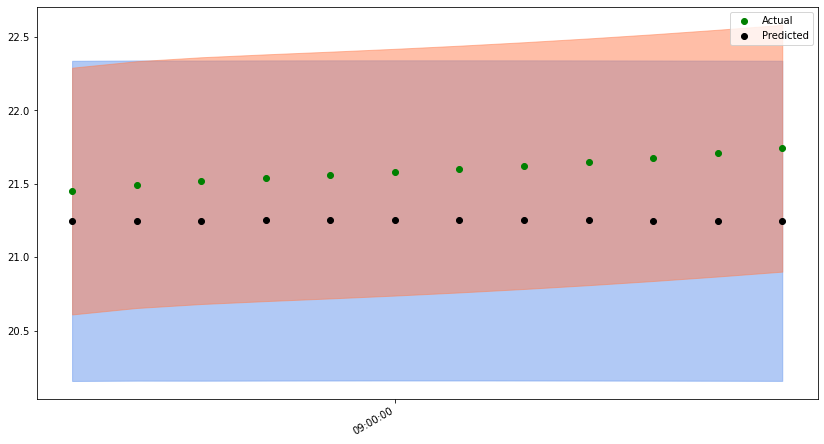

In [61]:
fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

#ax.plot(bounds.index, bounds['upper'].values, '--', color = 'red', label = 'Upper bound')
ax.plot(bounds.index, bounds['zone_temp'].values, 'o', color = 'green', label = 'Actual')
ax.plot(bounds.index, bounds['pred'].values, 'o', color = 'black', label = 'Predicted')
#ax.plot(bounds.index, bounds['lower'].values, '--', color = 'violet', label = 'Lower Bound')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.fill_between(bounds.index, bounds['upper'].values,bounds['lower'].values,color='cornflowerblue',alpha=.5)
plt.fill_between(bounds.index, bounds['upper_BMS'].values,bounds['lower_BMS'].values,color='coral',alpha=.5)
plt.legend()
plt.show()